# <center> An Introduction to Deep Learning With Python <center/>

### [6.3] Understanding recurrent neural networks
Prof. Yuzo Iano

pgs: 196 - 205

#### Pseudocode RNN

In [ ]:
state_t = 0
for input_t in input_sequence:
    output_t = f(input_t, state_t)
    state_t = output_t

#### More detailed pseudocode for the RNN

In [ ]:
state_t = 0
for input_t in input_sequence:
    output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
    state_t = output_t

#### Numpy implementation of a simple RNN

In [1]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t
    
final_output_sequence = np.concatenate(successive_outputs, axis=0)
print(final_output_sequence)

[0.99999789 0.99977317 0.99999977 ... 1.         1.         1.        ]


#### A recurrent layer in Keras

In [2]:
from keras.layers import SimpleRNN, Embedding
from keras.models import Sequential

model = Sequential()
model.add(Embedding(10000, 2))
model.add(SimpleRNN(32))
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 2)           20000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                1120      
Total params: 21,120
Trainable params: 21,120
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Embedding(10000, 2))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 2)           20000     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          1120      
Total params: 21,120
Trainable params: 21,120
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 2))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 2)           20000     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          1120      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 27,360
Trainable params: 27,360
Non-trainable params: 0
_________________________________________________________________


#### Preparing the IMDB data

In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape: ', input_train.shape)
print('input_test shape: ', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape:  (25000, 500)
input_test shape:  (25000, 500)


#### Training the model with Embedding and SimpleRNN layers

In [6]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 15s 758us/step - loss: 0.6521 - acc: 0.6042 - val_loss: 0.6121 - val_acc: 0.6576
Epoch 2/10
20000/20000 [==============================] - 15s 737us/step - loss: 0.4215 - acc: 0.8179 - val_loss: 0.4364 - val_acc: 0.8000
Epoch 3/10
20000/20000 [==============================] - 15s 726us/step - loss: 0.3063 - acc: 0.8754 - val_loss: 0.3803 - val_acc: 0.8346
Epoch 4/10
20000/20000 [==============================] - 14s 703us/step - loss: 0.2256 - acc: 0.9135 - val_loss: 0.4258 - val_acc: 0.8196
Epoch 5/10
20000/20000 [==============================] - 14s 711us/step - loss: 0.1610 - acc: 0.9411 - val_loss: 0.4326 - val_acc: 0.8094
Epoch 6/10
20000/20000 [==============================] - 14s 710us/step - loss: 0.0980 - acc: 0.9669 - val_loss: 0.4231 - val_acc: 0.8524
Epoch 7/10
20000/20000 [==============================] - 14s 707us/s

#### Plotting results

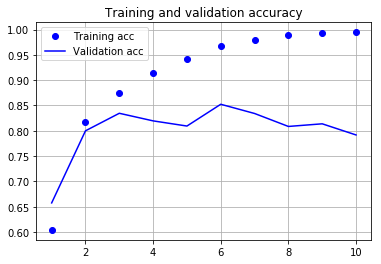

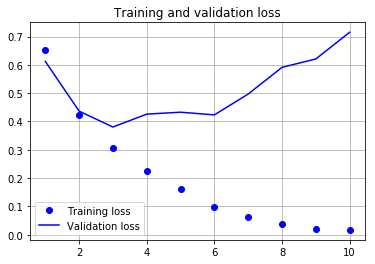

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()
plt.show()

#### Understanding the LSTM and GRU layers
Pseudocode details of the LSTM architecture (1/2)

In [ ]:
output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + bo)
i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)

Pseudocode details of the LSTM architecture (2/2)

In [ ]:
c_t+1 = i_t * k_t + c_t * f_t

#### Using the LSTM layer in Keras

In [9]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.5075 - acc: 0.7637 - val_loss: 0.3946 - val_acc: 0.8276
Epoch 2/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.2888 - acc: 0.8849 - val_loss: 0.3999 - val_acc: 0.8218
Epoch 3/10
20000/20000 [==============================] - 51s 3ms/step - loss: 0.2317 - acc: 0.9120 - val_loss: 0.2969 - val_acc: 0.8884
Epoch 4/10
20000/20000 [==============================] - 50s 3ms/step - loss: 0.1938 - acc: 0.9271 - val_loss: 0.3412 - val_acc: 0.8884
Epoch 5/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1746 - acc: 0.9360 - val_loss: 0.3060 - val_acc: 0.8804
Epoch 6/10
20000/20000 [==============================] - 54s 3ms/step - loss: 0.1534 - acc: 0.9452 - val_loss: 0.4010 - val_acc: 0.8752
Epoch 7/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.1404 - acc: 0.9506 - val_loss: 0.3010 - val_acc:

#### Ploting the results

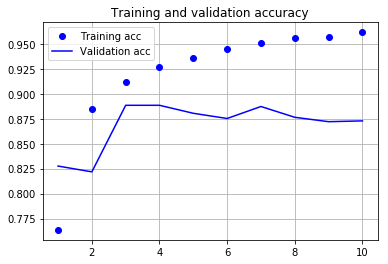

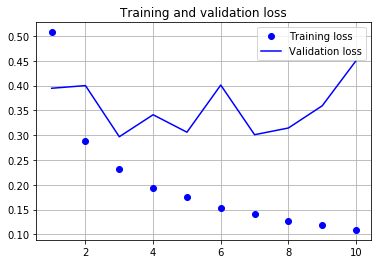

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()
plt.show()

###### Pablo Minango
* pablodavid218@gmail.com 